<h1 align="center">AtliQo Bank Credit Card Project: Phase 1</h1>

**Objective**: Analyze the customers, transactions and credit profile to find out the target group for launch the AtliQo bank credit card.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings("ignore")

<h1 align="center">Data Import<h1>

### Read it from MySQL

In [3]:
conn = mysql.connector.connect(
    host='localhost',
    username ='root',
    passwd='root',
    database ='e_master_card'
)

In [4]:
df_cust= pd.read_sql("select * from customers",conn)
df_cust.head() 

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [4]:
df_tran= pd.read_sql("select * from transactions",conn)
df_tran.head() 

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [5]:
df_cs= pd.read_sql("select * from credit_profiles",conn)
df_cs.head() 

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


<h1 style="color:green" align="center">Explore Customers Table<h1>

### 1. Analyze Annual Income Column

In [7]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [8]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [9]:
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [10]:
occupation_wise_income_median = df_cust.groupby("occupation").annual_income.median()
occupation_wise_income_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [11]:
occupation_wise_income_median['Artist']

44915.0

In [12]:
df_cust['annual_income'] = df_cust.apply(
    lambda row: occupation_wise_income_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
axis=1)

In [13]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

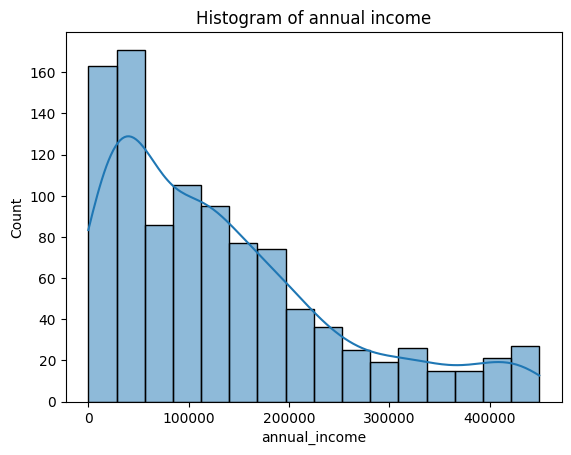

In [14]:
sns.histplot(df_cust['annual_income'],kde=True)
plt.title("Histogram of annual income")
plt.show()

In [15]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [16]:
for idx, row in df_cust.iterrows():
    if row['annual_income']<100:
        df_cust.at[idx,"annual_income"] = occupation_wise_income_median[row["occupation"]]

In [17]:
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


### 2. Data Visualization: Annual Income

We will explore average income level based on occupation, gender, location and marital status

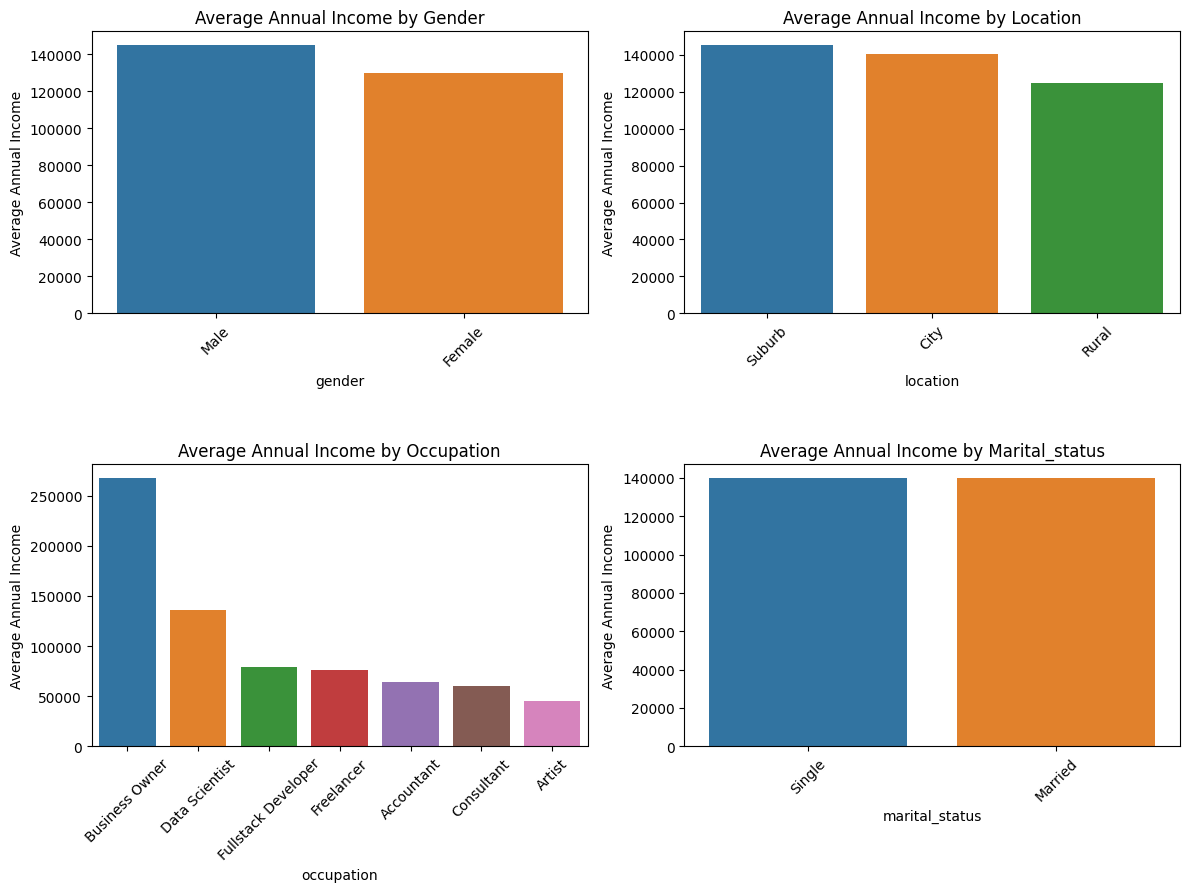

In [18]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):   # gendar 0
    
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col.capitalize()}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)): 
    fig.delaxes(axes[i]) 
plt.tight_layout()
plt.show()

### 3. Analyze Age Column

In [19]:
df_cust.age.isnull().sum()

0

In [20]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [21]:
outliers = df_cust[(df_cust.age < 15) | (df_cust.age > 80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [22]:
meadin_age_per_occupation = df_cust.groupby("occupation").age.median()
meadin_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [23]:
for idx, row in outliers.iterrows():
    df_cust.at[idx,'age'] = meadin_age_per_occupation[row['occupation']]

In [24]:
df_cust[(df_cust.age < 15) | (df_cust.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [25]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140137.395500
std,288.819436,12.276634,110450.464107
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


### 4. Data Visualization: Age Column

In [26]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [27]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [28]:
age_group_count= df_cust.age_group.value_counts(normalize=True)
age_group_count

age_group
26-48    0.567
18-25    0.246
49-65    0.187
Name: proportion, dtype: float64

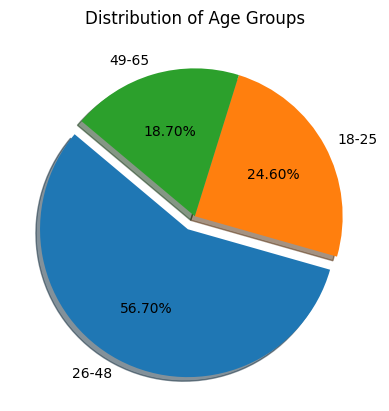

In [161]:
plt.pie(age_group_count, labels=age_group_count.index, autopct="%1.2f%%",explode=(0.1,0,0),shadow=True,startangle=140)
plt.title("Distribution of Age Groups")
plt.show()

In [30]:
cust_loc_gender = df_cust.groupby(["location","gender"]).size().unstack()
cust_loc_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


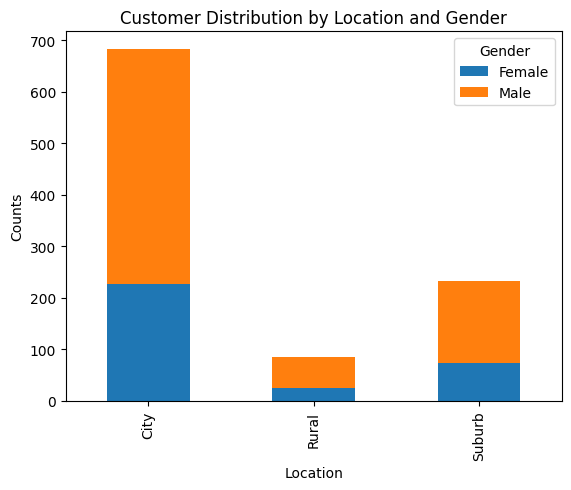

In [31]:
cust_loc_gender.plot(kind="bar",stacked=True)
plt.title("Customer Distribution by Location and Gender")

plt.legend(title="Gender")
plt.xlabel("Location")
plt.ylabel("Counts")
plt.show()

<h1 style="color:green" align="center">Explore Credit Score Table<h1>

### Data Cleaning Step 1: Remove Duplicates 

In [32]:
df_cust.shape

(1000, 9)

In [33]:
df_cs.shape

(1004, 6)

In [34]:
df_cs.cust_id.nunique()

1000

In [35]:
df_cs[df_cs.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [36]:
clean_cs_df_1 = df_cs.drop_duplicates(subset="cust_id",keep="last") # keep last row whereas drop first row
clean_cs_df_1.shape

(1000, 6)

In [37]:
clean_cs_df_1[clean_cs_df_1.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


### Data Cleaning Step 2: Handle Null Values

In [38]:
clean_cs_df_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [39]:
clean_cs_df_1[clean_cs_df_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [40]:
clean_cs_df_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

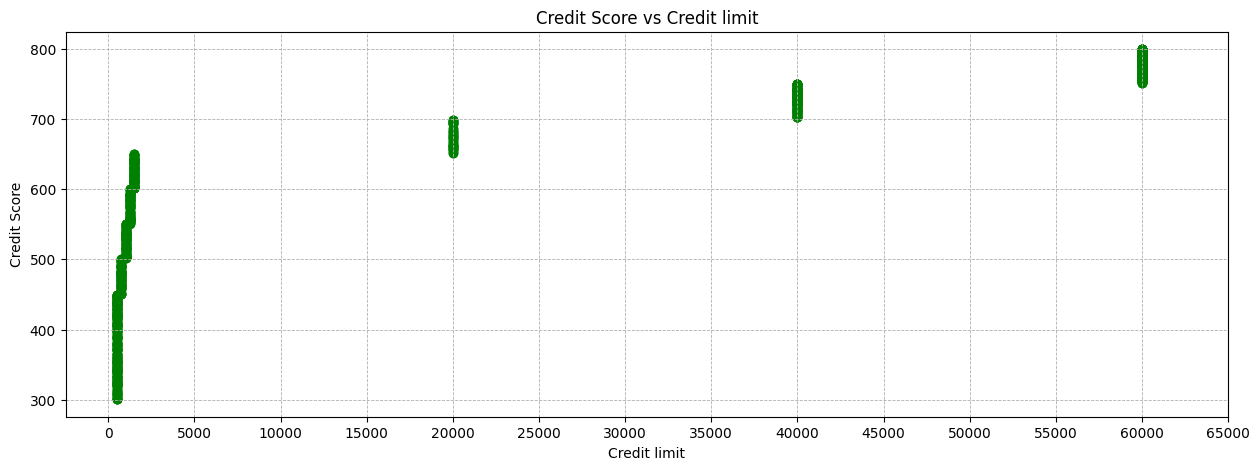

In [41]:
plt.figure(figsize=(15,5))
plt.scatter(clean_cs_df_1.credit_limit,clean_cs_df_1.credit_score,color="g",marker="o")

plt.grid(linestyle="dashed",linewidth=0.6)
plt.xticks(range(0,70000,5000))

plt.title("Credit Score vs Credit limit")
plt.xlabel("Credit limit")
plt.ylabel("Credit Score")
plt.show()

^ From above scatter plot we found credit limit is depend on credit score, have co-relationship with both variables.

In [42]:
bin_ranges=[300,450,500,550,600,650,700,750,800]
bin_labels = [ f'{start} - {end-1}' for start, end in zip(bin_ranges,bin_ranges[1:]) ]

clean_cs_df_1['credit_score_range'] = pd.cut(clean_cs_df_1['credit_score'], labels=bin_labels, bins=bin_ranges, include_lowest=True, right=False)

In [43]:
clean_cs_df_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700 - 749
1,2,587,0.107928,161644.0,2.0,1250.0,550 - 599
2,3,544,0.854807,513.0,4.0,1000.0,500 - 549
3,4,504,0.336938,224.0,2.0,1000.0,500 - 549
4,5,708,0.586151,18090.0,2.0,40000.0,700 - 749


In [44]:
df_mode= clean_cs_df_1.groupby("credit_score_range").credit_limit.agg(lambda x : x.mode().iloc[0]).reset_index()
df_mode

,credit_score_range,credit_limit
0,300 - 449,500.0
1,450 - 499,750.0
2,500 - 549,1000.0
3,550 - 599,1250.0
4,600 - 649,1500.0
5,650 - 699,20000.0
6,700 - 749,40000.0
7,750 - 799,60000.0


In [45]:
clean_cs_df_2 = pd.merge(clean_cs_df_1,df_mode,on='credit_score_range',suffixes=("","_mode"))

In [46]:
clean_cs_df_2.sample(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
86,606,734,0.193418,4392.0,1.0,40000.0,700 - 749,40000.0
922,668,764,0.553728,20375.0,2.0,60000.0,750 - 799,60000.0
957,820,795,0.367146,18694.0,4.0,60000.0,750 - 799,60000.0
764,768,609,0.785706,984.0,1.0,1500.0,600 - 649,1500.0


In [47]:
clean_cs_df_2[clean_cs_df_2.credit_limit.isnull()].sample(3) 

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
693,115,619,0.128910,151.0,1.0,NaN,600 - 649,1500.0
606,663,478,0.154754,84.0,0.0,NaN,450 - 499,750.0
584,432,464,0.860153,399.0,0.0,NaN,450 - 499,750.0


In [48]:
clean_cs_df_3 = clean_cs_df_2.copy()
clean_cs_df_3['credit_limit'].fillna(clean_cs_df_3['credit_limit_mode'],inplace=True)

In [49]:
clean_cs_df_2[clean_cs_df_2.credit_limit.isnull()].shape

(65, 8)

In [50]:
clean_cs_df_3[clean_cs_df_3.credit_limit.isnull()].shape

(0, 8)

In [51]:
clean_cs_df_2[clean_cs_df_2.credit_limit.isnull()].sample(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
97,687,736,0.738382,17882.0,3.0,NaN,700 - 749,40000.0
889,478,757,0.160767,6286.0,2.0,NaN,750 - 799,60000.0
201,769,563,0.865592,898.0,3.0,NaN,550 - 599,1250.0
170,326,599,0.791918,501.0,0.0,NaN,550 - 599,1250.0


In [52]:
clean_cs_df_3.iloc[['227','101']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
227,38,514,0.296971,238.0,2.0,1000.0,500 - 549,1000.0
101,726,737,0.136048,205404.0,4.0,40000.0,700 - 749,40000.0


### Data Cleaning Step 3: Handle Outliers: outstanding_debt

In [53]:
clean_cs_df_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


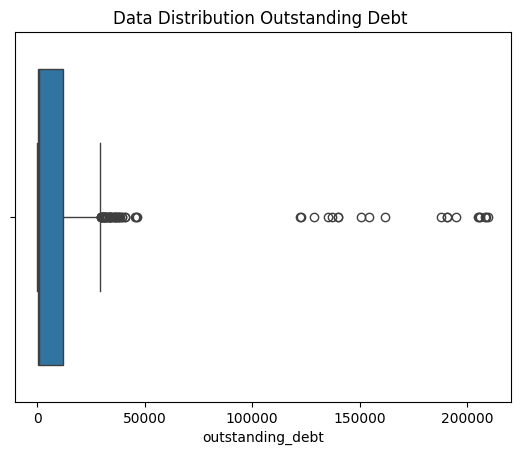

In [54]:
sns.boxplot(x=clean_cs_df_3['outstanding_debt'])

plt.title("Data Distribution Outstanding Debt ")
plt.show()

In [55]:
clean_cs_df_3[clean_cs_df_3.outstanding_debt > clean_cs_df_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,122758.0,3.0,40000.0,700 - 749,40000.0
12,94,737,0.739948,137058.0,2.0,40000.0,700 - 749,40000.0
35,272,703,0.446886,154568.0,1.0,40000.0,700 - 749,40000.0
41,302,722,0.608076,122402.0,4.0,40000.0,700 - 749,40000.0
101,726,737,0.136048,205404.0,4.0,40000.0,700 - 749,40000.0
142,2,587,0.107928,161644.0,2.0,1250.0,550 - 599,1250.0
363,205,303,0.364360,187849.0,0.0,500.0,300 - 449,500.0
406,351,320,0.285081,150860.0,0.0,500.0,300 - 449,500.0
474,637,420,0.323984,140063.0,4.0,500.0,300 - 449,500.0
604,647,498,0.658087,128818.0,3.0,750.0,450 - 499,750.0


In [56]:
clean_cs_df_3.loc[clean_cs_df_3.outstanding_debt > clean_cs_df_3.credit_limit,'outstanding_debt'] = clean_cs_df_3.credit_limit

In [57]:
clean_cs_df_3[clean_cs_df_3.outstanding_debt > clean_cs_df_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


### Data Exploration: Visualizing Correlation in Credit Score Table

In [58]:
df_cust.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25


In [59]:
clean_cs_df_3.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700 - 749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700 - 749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700 - 749,40000.0


In [60]:
df_merged = df_cust.merge(clean_cs_df_3,on="cust_id",how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700 - 749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550 - 599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500 - 549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500 - 549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700 - 749,40000.0


In [61]:
num_cols = df_merged[['credit_score','credit_limit','credit_utilisation','outstanding_debt','annual_income','age',]]
correlation_matrix= num_cols.corr()
correlation_matrix

,credit_score,credit_limit,credit_utilisation,outstanding_debt,annual_income,age
credit_score,1.000000,0.847952,-0.070445,0.680654,0.575685,0.444917
credit_limit,0.847952,1.000000,-0.080493,0.810581,0.684627,0.510993
credit_utilisation,-0.070445,-0.080493,1.000000,0.192838,-0.086816,-0.027713
outstanding_debt,0.680654,0.810581,0.192838,1.000000,0.555077,0.444301
annual_income,0.575685,0.684627,-0.086816,0.555077,1.000000,0.618136
age,0.444917,0.510993,-0.027713,0.444301,0.618136,1.000000


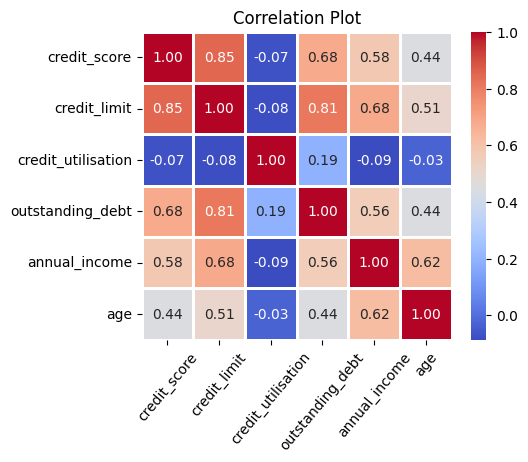

In [155]:
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.8)

plt.xticks(rotation=50)
plt.title("Correlation Plot")
plt.show()

<h1 style="color:green" align="center">Explore Transactions Table<h1>

### 1. Handle Null Values

In [63]:
df_tran.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [64]:
df_tran.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


In [65]:
df_tran[df_tran.platform.isnull()].head(2)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card


In [66]:
df_tran.platform.mode()

0    Amazon
Name: platform, dtype: object

In [67]:
df_tran.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

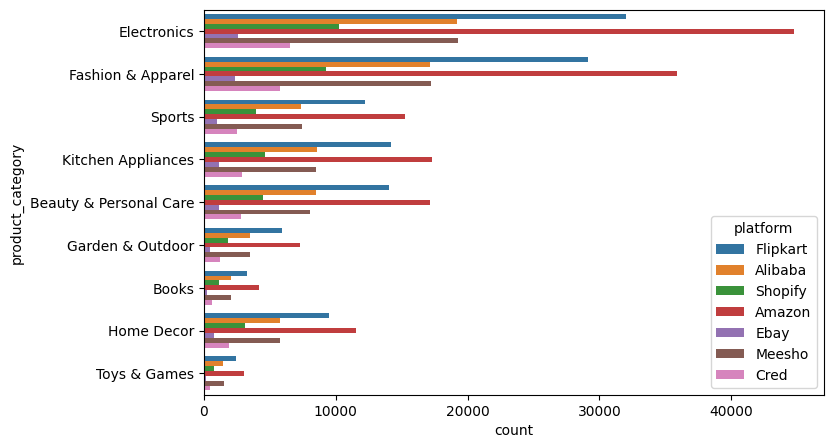

In [163]:
plt.figure(figsize=(8,5))
sns.countplot(y='product_category',hue='platform',data=df_tran)
plt.show()

In [69]:
df_tran.platform.mode()[0]

'Amazon'

In [70]:
df_tran['platform'].fillna(df_tran.platform.mode()[0],inplace=True)

In [71]:
df_tran.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

See, null values is not there it's gone

### 2. Handle Outliers in tran amount coloum

In [72]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [73]:
df_zero_amt =df_tran[df_tran.tran_amount==0]
df_zero_amt.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [74]:
df_zero_amt[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [75]:
df_tran_1 =df_tran[(df_tran.platform=='Amazon') & (df_tran.product_category=='Electronics') & (df_tran.payment_type=='Credit Card')]
df_tran_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [76]:
median_to_replace =df_tran_1[df_tran_1.tran_amount>0].tran_amount.median()
median_to_replace

554.0

In [77]:
df_tran['tran_amount'].replace(0,median_to_replace,inplace=True)

In [78]:
df_tran[df_tran.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [79]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


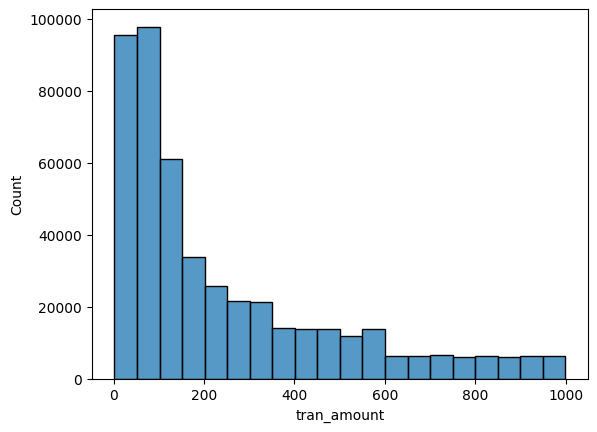

In [80]:
sns.histplot(df_tran[df_tran.tran_amount<10000].tran_amount,bins=20)
plt.show()

In [81]:
Q1,Q3 = df_tran.tran_amount.quantile([0.25,0.75])
Q1,Q3

(66.0, 413.0)

In [82]:
IQR = Q3-Q1
IQR

347.0

In [83]:
lower= Q1 - 2*IQR
upper= Q3 + 2*IQR
lower,upper

(-628.0, 1107.0)

In [84]:
df_tran_outliers =df_tran[df_tran.tran_amount>upper]
df_tran_outliers.shape

(25000, 7)

In [85]:
df_tran_normal =df_tran[df_tran.tran_amount < upper]
df_tran_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [86]:
tran_mean_per_category =df_tran_normal.groupby("product_category").tran_amount.mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [87]:
df_tran.loc[df_tran_outliers.index,'tran_amount'] = df_tran_outliers['product_category'].map(tran_mean_per_category)

In [88]:
df_tran.loc[df_tran_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


In [89]:
df_tran[df_tran.tran_amount > upper]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


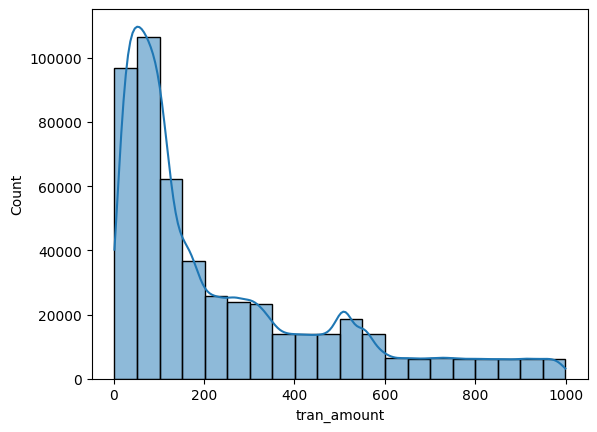

In [90]:
sns.histplot(df_tran.tran_amount,kde=True,bins=20)
plt.show()

^ Above Data Distribution is a Right Skewed

<h1 style="color:green" align="center">Visualization of Data Insights<h1>

In [92]:
df_tran.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


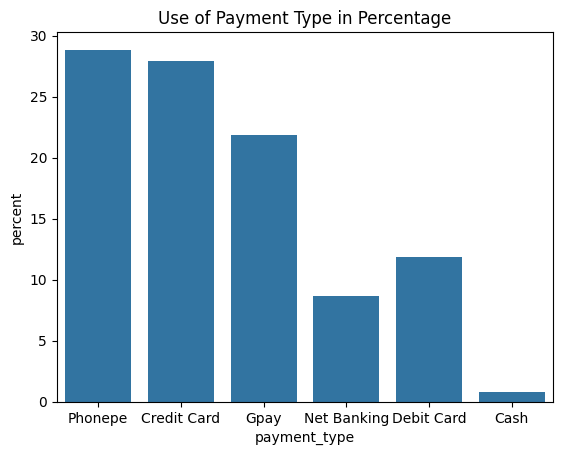

In [160]:
sns.countplot(x=df_tran.payment_type,stat='percent')
plt.title("Use of Payment Type in Percentage")
plt.show() 

In [101]:
df_merged.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700 - 749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550 - 599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500 - 549,1000.0


In [108]:
df_merged_2 =pd.merge(df_merged,df_tran,on='cust_id',how='inner')

In [111]:
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700 - 749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700 - 749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700 - 749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


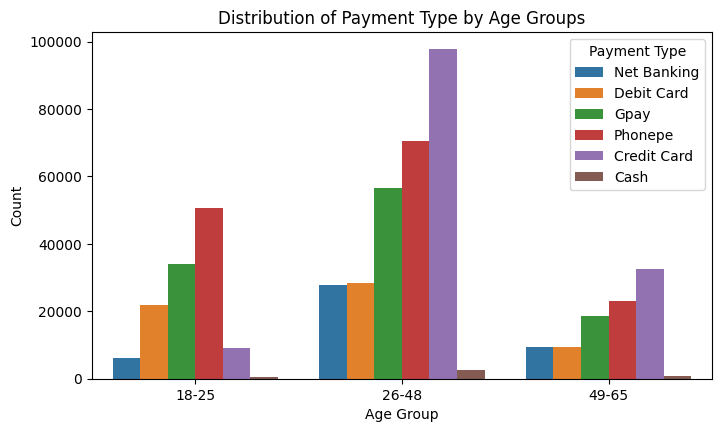

In [164]:
plt.figure(figsize=(8,4.5))

sns.countplot(x=df_merged_2.age_group,hue=df_merged_2.payment_type)
plt.title("Distribution of Payment Type by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Payment Type")
plt.show()

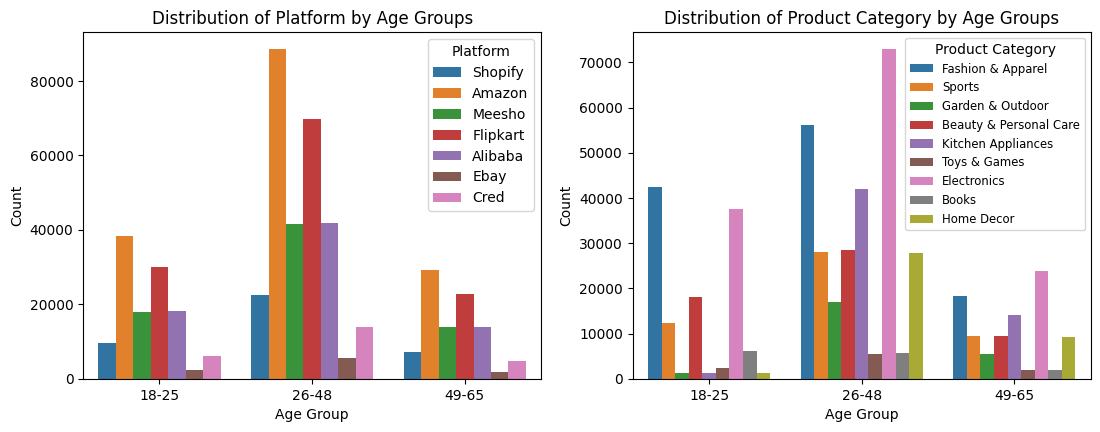

In [166]:
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(13,4.5))

sns.countplot(x=df_merged_2.age_group,hue=df_merged_2.platform,ax=ax1)
ax1.set_title("Distribution of Platform by Age Groups")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Platform")

sns.countplot(data=df_merged_2, x='age_group', hue='product_category',ax=ax2)
ax2.set_title("Distribution of Product Category by Age Groups")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category",fontsize='small')

plt.show()

### Visualization of Average Transaction Amount

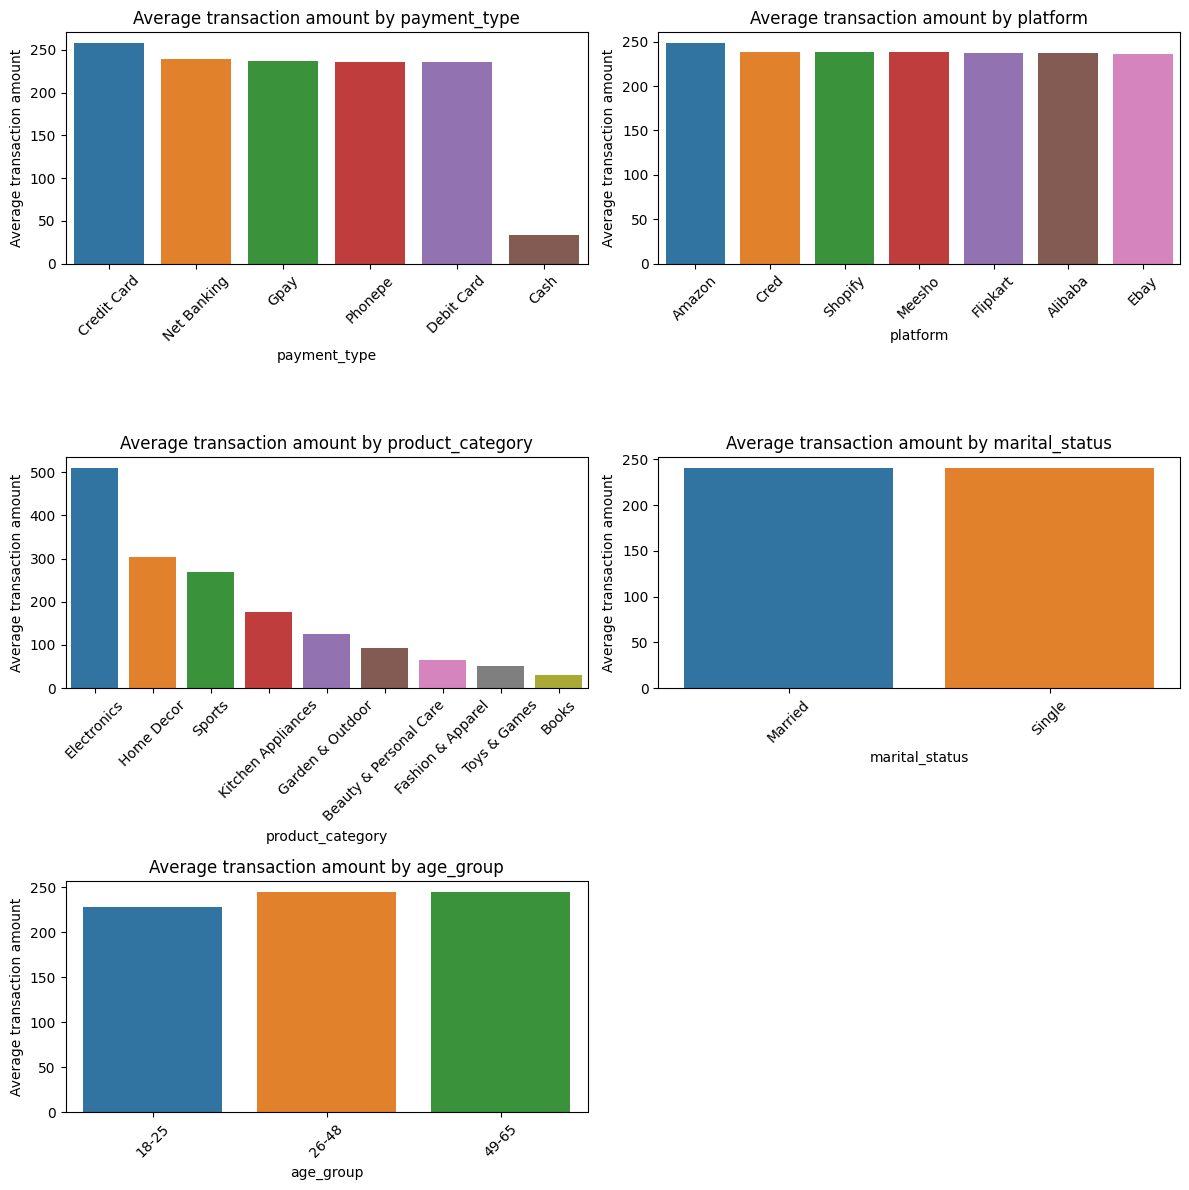

In [144]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [146]:
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,36969.670732,1130.081301,484.451220
1,26-48,145437.104938,20560.846561,597.569665
2,49-65,259786.192513,41699.197861,701.524064


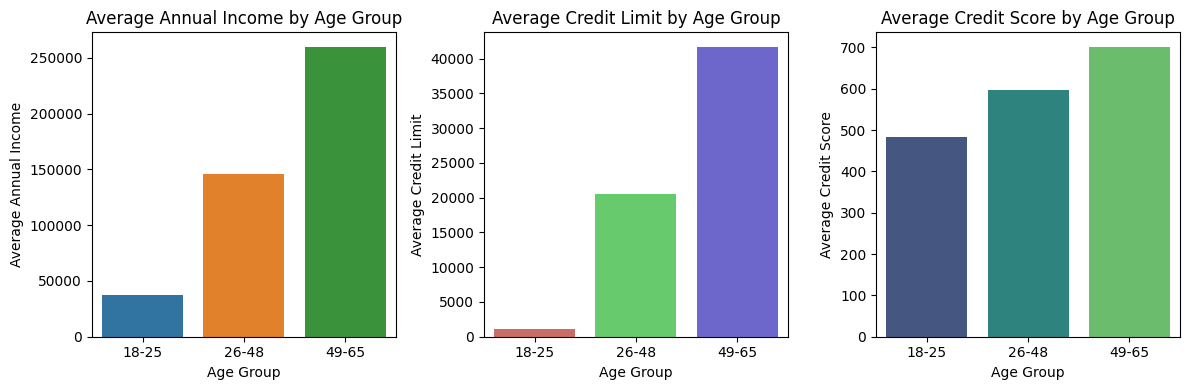

In [149]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:green">Finalize Target Market For a Trial Credit Card Launch<h2>

1. People with age group of 18 -25 accounts to ~25% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care